Distribution Plots
Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

distplot
jointplot
pairplot
rugplot
kdeplot

# IMPORT LIBRARIES

In [3]:
import seaborn as sns
%matplotlib inline

DATA

In [10]:
df=sns.load_dataset('tips')

In [11]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Distplot

The distplot shows the distribution of a univariate set of observations.

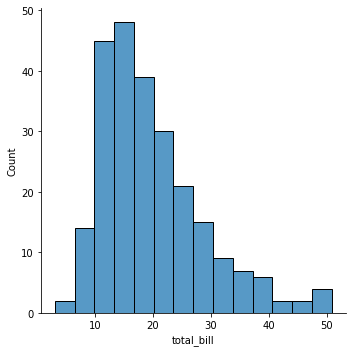

In [25]:
sns.displot(data=df['total_bill'])

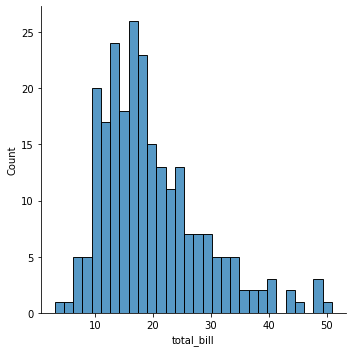

In [24]:
sns.displot(data=df['total_bill'],bins=30)

# jointplot
jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare with:

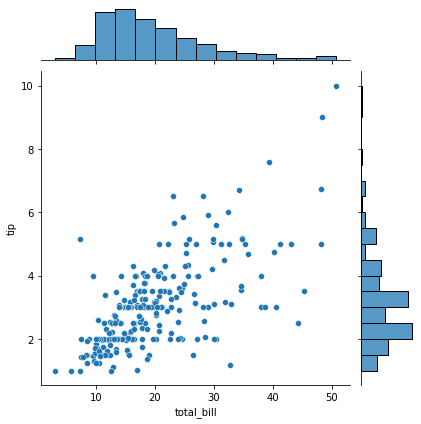

In [28]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='scatter')

# kernel density estimate

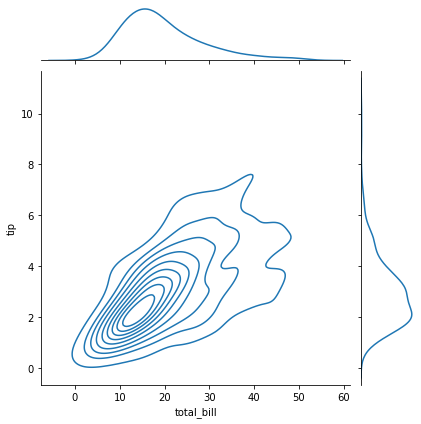

In [29]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='kde')

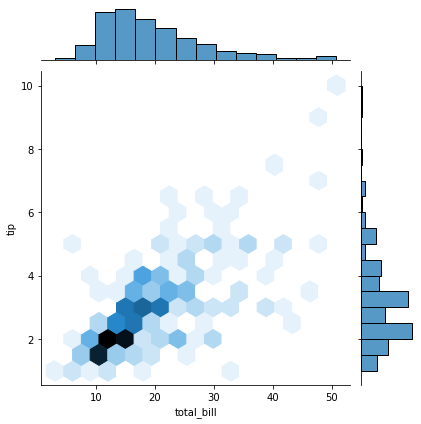

In [30]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex')

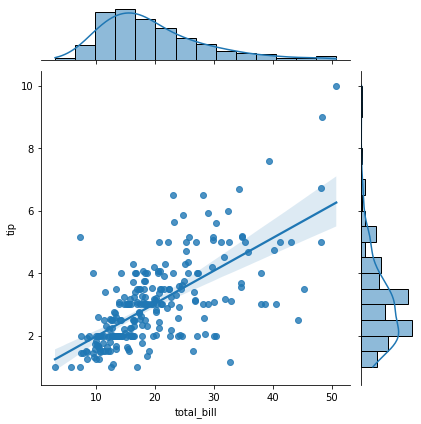

In [32]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='reg')

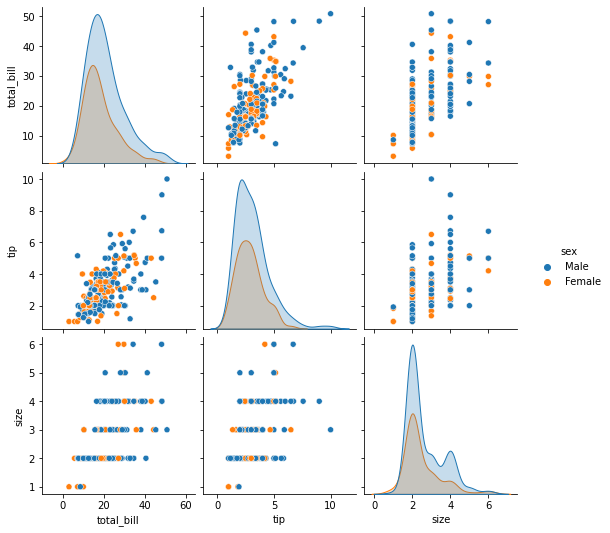

In [37]:
sns.pairplot(df,hue='sex')

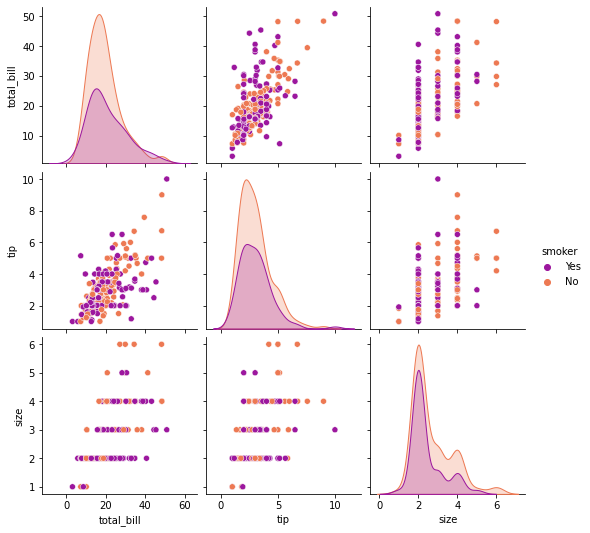

In [41]:
sns.pairplot(df,hue='smoker',palette='coolwarm')  #plasma

# rugplot
rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

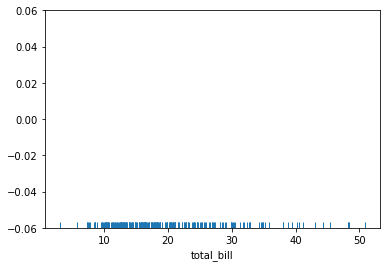

In [42]:
sns.rugplot(df['total_bill'])

# barplot and countplot
These very similar plots allow you to get aggregate data off a categorical feature in your data. barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean: 

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

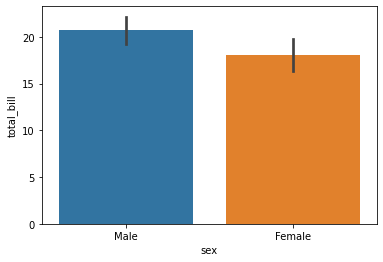

In [44]:
sns.barplot(x='sex',y='total_bill',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

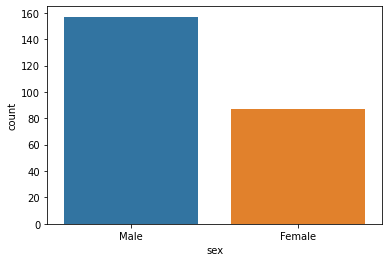

In [47]:
sns.countplot(x='sex',data=df)

# boxplot and violinplot
boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

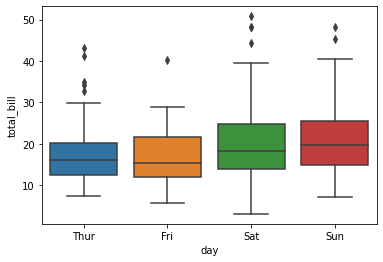

In [51]:
sns.boxplot(y='total_bill',x='day',data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

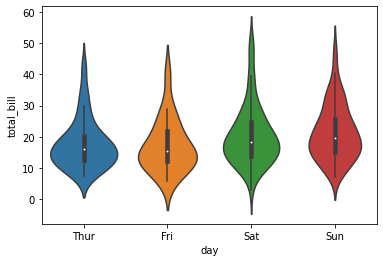

In [52]:
sns.violinplot(y='total_bill',x='day',data=df)

# Heatmap
In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example

In [55]:
tp=df.pivot_table(values='total_bill',index='sex',columns='size')

In [56]:
tp

size,1,2,3,4,5,6
sex,,,,,,
Male,8.580000,17.104082,24.287083,28.078214,30.1225,41.235
Female,6.796667,15.339483,21.547143,30.278889,29.8500,28.425


<AxesSubplot:xlabel='size', ylabel='sex'>

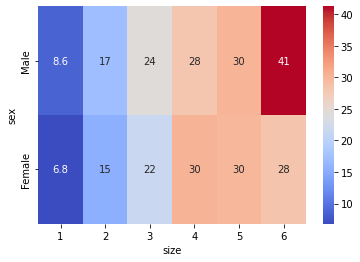

In [59]:
sns.heatmap(tp,cmap='coolwarm',annot=True)

In [60]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

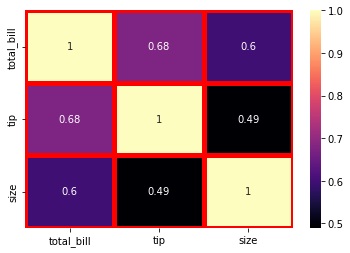

In [67]:
sns.heatmap(df.corr(),linewidths=5,linecolor='red',cmap='magma',annot=True)

<AxesSubplot:xlabel='size', ylabel='sex'>

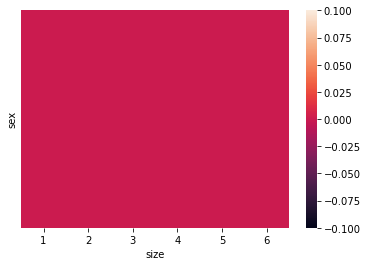

In [69]:
sns.heatmap(tp.isnull(),yticklabels=False,cbar='magma')

In [75]:
import matplotlib.pyplot as plt

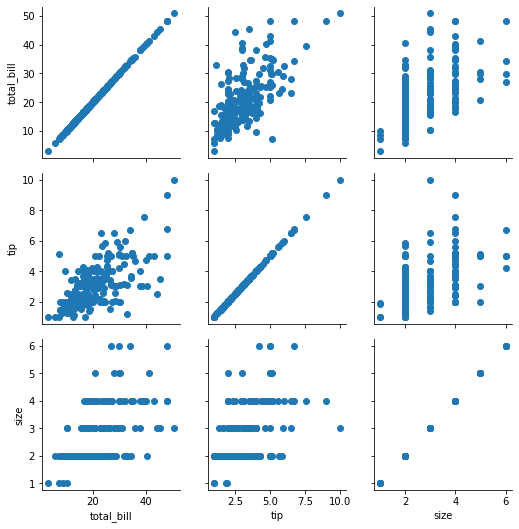

In [77]:
g = sns.PairGrid(df)
g.map(plt.scatter)

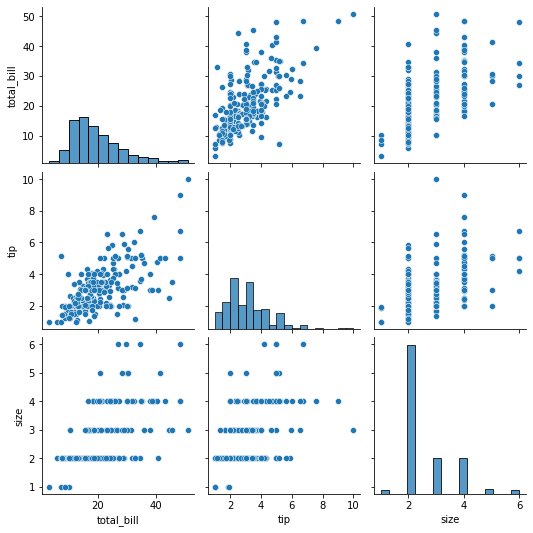

In [80]:
sns.pairplot(df,kind='scatter')

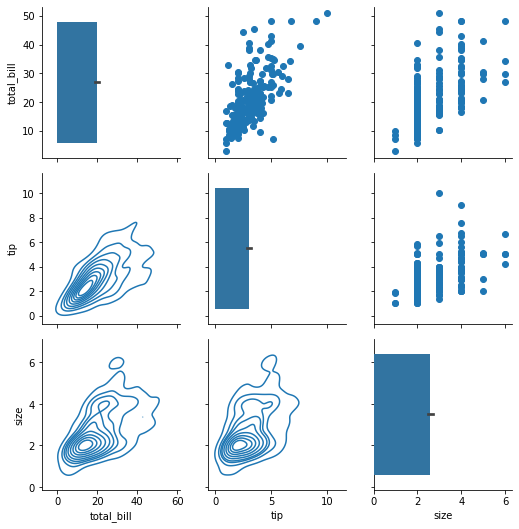

In [86]:
g = sns.PairGrid(df)
g.map_diag(sns.barplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

# Using a Grid
We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

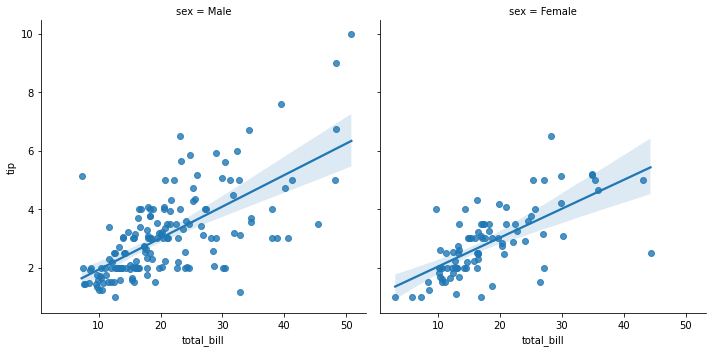

In [89]:
sns.lmplot(x='total_bill',y='tip',data=df,col='sex')

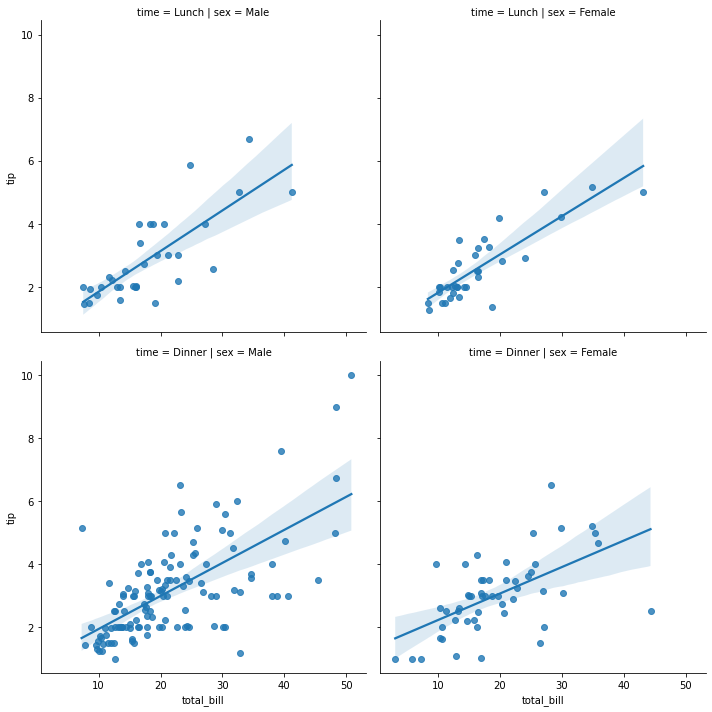

In [90]:
sns.lmplot(x='total_bill',y='tip',data=df,col='sex',row='time')

# Thank you